0.07299761267052156
1.14
1.16772


Text(0,0.5,'Reactivity $k_\\infty$')

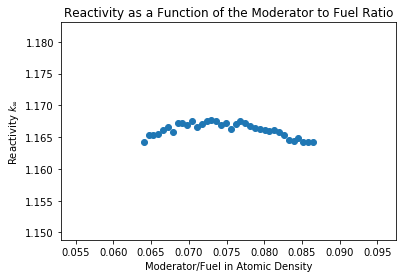

In [13]:
import math
import csv
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#csv reader
csv_arr = []
with open('cp3_data.csv') as csv_in:
    filereader = csv.reader(csv_in)
    for row in filereader:
        csv_arr.append(row)
#I accidentally deleted the majority of my res.m output files, but kept a list of the implicit keff, which is what this uses
imp_k = [float(i) for i in csv_arr[0]]
mass_dens = [float(i) for i in csv_arr[1]]

higher_end = [1.5,3,6]
high_stuff = [1.15709,1.03713,.8007]
#This was from when I thought we were calculating reactivities
#Calculating reactivity and moderator/fuel ratio
#def reactivity(k_values):
#    p_values =[]
#    this = np.arange(0, len(k_values))
#    for i in this:
#        tat = (k_values[i]-1)/k_values[i]
#        p_values.append(tat)
#    return p_values
#reactivities = reactivity(imp_k)

#This converts the moderators in mass density to atom density, then divides by the fuel in atom density
def mod_fuel_ratio(mod_dense):
    ratio = []
    atom_dense = []
    that = np.arange(0, len(mod_dense))
    for i in that:
        #The moderator mass density doesn't change, so neither does its atom density, precalculated here
        tit = (mod_dense[i]/18)*2/3*6.022e23
        atom_dense.append(tit)
        rat = (tit/2.277587746e22)*.06538858453
        ratio.append(rat)
    return ratio

mod_fuel_ratios = mod_fuel_ratio(mass_dens)
outly_mod = mod_fuel_ratio(higher_end)
#print(mod_fuel_ratio(higher_end))
#print(mod_fuel_ratios)
print(mod_fuel_ratios[imp_k.index(max(imp_k))])
print(mass_dens[imp_k.index(max(imp_k))])
print(max(imp_k))
#This is mainly for making the graph
plt.scatter(mod_fuel_ratios,imp_k)
plt.title("Reactivity as a Function of the Moderator to Fuel Ratio")
plt.xlabel("Moderator/Fuel in Atomic Density")
plt.ylabel("Reactivity $k_\infty$")

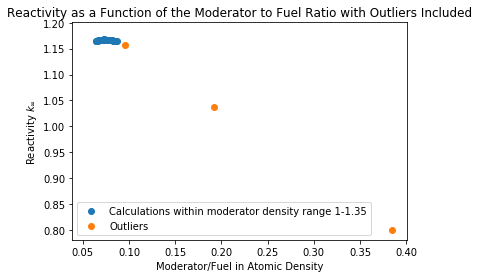

In [14]:
#This is the graph with the outliers used to determine where to start calculations
plt.scatter(mod_fuel_ratios,imp_k,label = 'Calculations within moderator density range 1-1.35')
plt.title("Reactivity as a Function of the Moderator to Fuel Ratio with Outliers Included")
plt.xlabel("Moderator/Fuel in Atomic Density")
plt.ylabel("Reactivity $k_\infty$")
plt.scatter(outly_mod,high_stuff,label='Outliers')
plt.legend()